In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
ds_salaries_df = pd.read_csv("Resources/ds_salaries.csv")
del ds_salaries_df["Unnamed: 0"]

ds_renamed_df = ds_salaries_df.rename(columns={"work_year":"Work Year",
                                              "experience_level":"Experience Level",
                                              "employment_type":"Employment Type",
                                              "job_title":"Job Title",
                                              "salary":"Salary",
                                              "salary_currency":"Salary Currency",
                                              "salary_in_usd": "Salary in USD",
                                              "employee_residence":"Employee Residence",
                                              "remote_ratio":"Remote Ratio",
                                              "company_location":"Company Location",
                                              "company_size":"Company Size"})

ds_renamed_df

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
#REMOTE RATIO
ds_renamed_df["Remote Ratio"].value_counts()

100    381
0      127
50      99
Name: Remote Ratio, dtype: int64

In [5]:
remote_ratio = ds_renamed_df.groupby(["Remote Ratio"])

salary_mean = remote_ratio["Salary in USD"].mean()
salary_median = remote_ratio["Salary in USD"].median()
salary_var = remote_ratio["Salary in USD"].var()
salary_std = remote_ratio["Salary in USD"].std()

salary_remote_summary_df = pd.DataFrame({"Mean": salary_mean,
                         "Median": salary_median,
                         "Variance": salary_var,
                         "Std Deviation": salary_std
                          })
salary_remote_summary_df

,Mean,Median,Variance,Std Deviation
Remote Ratio,,,,
0,106354.622047,99000,4.586613e+09,67724.540800
50,80823.030303,69999,3.289377e+09,57353.093614
100,122457.454068,115000,5.286867e+09,72710.843718


Text(0.5, 1.0, 'Distribution of Employee Working from Home vs Office')

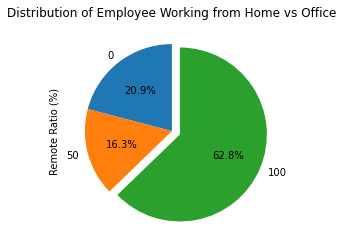

In [6]:
labels = ["0", "50", "100"]
sizes = [127, 99, 381]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=90)
plt.ylabel("Remote Ratio (%)")
plt.title("Distribution of Employee Working from Home vs Office")


Text(0.5, 1.0, 'Employee Salary vs Work from Home')

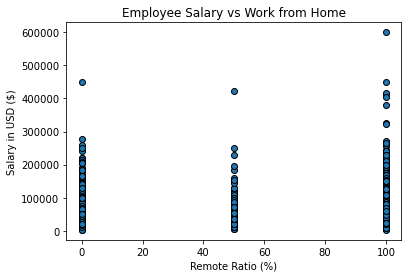

In [7]:
plt.scatter(ds_renamed_df["Remote Ratio"], ds_renamed_df["Salary in USD"], edgecolor = "black")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary in USD ($)")
plt.title("Employee Salary vs Work from Home")

In [8]:
#EXPERIENCE LEVEL
ds_renamed_df["Experience Level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: Experience Level, dtype: int64

In [11]:
exp_level = ds_renamed_df.groupby(["Experience Level"])

salary2_mean = exp_level["Salary in USD"].mean()
salary2_median = exp_level["Salary in USD"].median()
salary2_var = exp_level["Salary in USD"].var()
salary2_std = exp_level["Salary in USD"].std()

salary_explevel_summary_df = pd.DataFrame({"Mean": salary2_mean,
                         "Median": salary2_median,
                         "Variance": salary2_var,
                         "Std Deviation": salary2_std
                          })

salary_explevel_summary_df.reindex(["EN", "MI", "SE", "EX"])




,Mean,Median,Variance,Std Deviation
Experience Level,,,,
EN,61643.318182,56500.0,1.970964e+09,44395.541126
MI,87996.056338,76940.0,4.083345e+09,63901.057478
SE,138617.292857,135500.0,3.328364e+09,57691.978337
EX,199392.038462,171437.5,1.370568e+10,117071.255697


Text(0.5, 1.0, 'Distribution of Employee Experience Level')

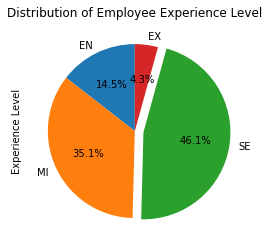

In [12]:
labels2 = ["EN", "MI", "SE", "EX"]
sizes2 = [88, 213, 280, 26]
explode2 = (0, 0, 0.1, 0)

plt.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        startangle=90)
plt.ylabel("Experience Level")
plt.title("Distribution of Employee Experience Level")

Text(0.5, 1.0, 'Employee Salary vs Employee Experience Level')

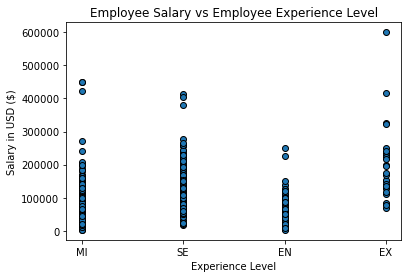

In [13]:
plt.scatter(ds_renamed_df["Experience Level"], ds_renamed_df["Salary in USD"], edgecolor = "black")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD ($)")
plt.title("Employee Salary vs Employee Experience Level")